In [11]:
import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import seaborn as sns
# To Plot matplotlib figures inline on the notebook
%matplotlib inline

sns.set_style("whitegrid")

from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV


#This is for displaying the tree (we shouldn't need these now)
#!pip install pydotplus
#!pip install GraphViz
#import pydotplus as pydot
#from IPython.display import Image
from sklearn.externals.six import StringIO

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

In [12]:
datafile = 'ModelData1.csv'

df = pd.read_csv(datafile)
df

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,2000-11-01,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,2005-10-12,NaN,NaN,NaN,NaN,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,NaN,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,2008-11-18,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,2007-10-30,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,2009-11-12,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720
5,5,10220,Postal 3,0,-1,-1,-1,0,2011-12-21,NaN,NaN,NaN,NaN,11.99,4.79,60.0,0,24.0,0,-1,-1,2,0,7.830e+04,8137.0,6.901e+04,88.14,2491.0,3.18,2.1,7.1,3,0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,4.894
6,6,102400,Vertex Dispenser,0,1,1,0,1,2011-06-10,NaN,NaN,NaN,NaN,9.99,4.99,50.0,0,70.0,0,-1,-1,0,0,3.304e+04,4840.0,1.299e+04,39.33,0.0,0.00,NaN,NaN,5,1,2.0,1,1,1,0,0,0,0,0,0,0,0,0,4.519
7,7,10250,PT Boats: Knights of the Sea,0,-1,-1,-1,0,2009-01-30,NaN,NaN,NaN,NaN,6.99,2.49,75.0,0,NaN,-1,-1,-1,0,0,1.151e+04,2856.0,9.837e+03,85.49,0.0,0.00,1.4,2.7,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.061
8,8,102500,Kingdoms of Amalur: Reckoning™,0,-1,-1,-1,0,2012-02-07,0.0,100.0,87.28,7748.0,19.99,4.39,78.0,3,81.0,0,-1,-1,5,0,8.919e+05,27437.0,7.470e+05,83.76,19465.0,2.18,9.2,26.6,6,4,13.0,1,0,0,0,1,0,0,0,0,0,0,0,5.950
9,9,10260,PT Boats: South Gambit,0,-1,-1,-1,0,2010-12-10,NaN,NaN,NaN,NaN,6.99,2.49,75.0,0,NaN,-1,-1,-1,0,0,1.132e+04,2833.0,6.867e+03,60.65,0.0,0.00,NaN,2.0,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.054


In [13]:
#convert Release_Date column to a datetime object
from dateutil.parser import *

def toDT(d):
    #print(d)
    if d == np.nan or d == 'nan': return np.nan
    try:
        date = parse(d)
        return date.timestamp()
    except (ValueError,TypeError):
        print("unparsable data:",d)
        return np.nan

df['Release_Date'] = df['Release_Date'].map(toDT)
df.head()
#note, can't re-run this without the code above, as it changes data in place

unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable data: nan
unparsable da

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,9.731e+08,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,1.129e+09,NaN,NaN,NaN,NaN,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,NaN,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,1.227e+09,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,1.194e+09,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,1.258e+09,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720


In [14]:
df.Release_Date

0       9.731e+08
1       1.129e+09
2       1.227e+09
3       1.194e+09
4       1.258e+09
5       1.324e+09
6       1.308e+09
7       1.233e+09
8       1.329e+09
9       1.292e+09
10      1.318e+09
11      1.392e+09
          ...    
6986    1.237e+09
6987    1.306e+09
6988    1.252e+09
6989    1.311e+09
6990    1.265e+09
6991    1.309e+09
6992    1.304e+09
6993    1.297e+09
6994    1.320e+09
6995    1.285e+09
6996    1.308e+09
6997    1.315e+09
Name: Release_Date, Length: 6998, dtype: float64

In [15]:
#filter filter out free and price errored games, and set all NaN to -1

df = df.fillna(value=-1)
df = df.loc[df['Price'] > 0,:]
df

,Unnamed: 0,ID_num,Name,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_Indie,genre_Strategy,genre_Simulation,genre_RPG,genre_Adventure,genre_Casual,genre_Early Access,genre_Racing,genre_Sports,genre_Free to Play,genre_Massively Multiplayer,owners_log
0,0,10,Counter-Strike,0,1,1,1,1,9.731e+08,0.0,100.0,97.74,93913.0,9.99,2.49,75.0,0,88.0,0,-1,-1,0,0,1.344e+07,96036.0,9.427e+06,70.13,361920.0,2.69,6.9,185.9,65,0,24.0,1,0,0,0,0,0,0,0,0,0,0,0,7.128
1,1,1002,Rag Doll Kung Fu,0,-1,-1,-1,0,1.129e+09,-1.0,-1.0,-1.00,-1.0,9.99,2.49,75.0,0,69.0,-1,-1,-1,0,0,3.935e+04,5282.0,1.188e+04,30.19,0.0,0.00,-1.0,1.1,4,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,4.595
2,2,10090,Call of Duty: World at War,0,-1,-1,-1,0,1.227e+09,0.0,100.0,92.69,16971.0,19.99,9.79,51.0,0,83.0,0,-1,-1,0,0,1.674e+06,34382.0,1.424e+06,85.07,106163.0,6.34,12.5,42.1,41,0,7.0,1,0,0,0,0,0,0,0,0,0,0,0,6.224
3,3,10130,TimeShift,0,-1,-1,-1,0,1.194e+09,0.0,100.0,76.69,653.0,19.99,4.99,75.0,0,71.0,0,-1,-1,0,0,1.340e+05,9746.0,5.549e+04,41.41,1172.0,0.87,1.1,3.1,6,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,5.127
4,4,10180,Call of Duty: Modern Warfare 2,0,-1,-1,-1,0,1.258e+09,0.0,100.0,90.93,26992.0,19.99,9.79,51.0,0,86.0,0,-1,-1,8,0,5.246e+06,60607.0,4.687e+06,89.33,70157.0,1.34,9.4,23.5,37,0,18.0,1,0,0,0,0,0,0,0,0,0,0,0,6.720
5,5,10220,Postal 3,0,-1,-1,-1,0,1.324e+09,-1.0,-1.0,-1.00,-1.0,11.99,4.79,60.0,0,24.0,0,-1,-1,2,0,7.830e+04,8137.0,6.901e+04,88.14,2491.0,3.18,2.1,7.1,3,0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,4.894
6,6,102400,Vertex Dispenser,0,1,1,0,1,1.308e+09,-1.0,-1.0,-1.00,-1.0,9.99,4.99,50.0,0,70.0,0,-1,-1,0,0,3.304e+04,4840.0,1.299e+04,39.33,0.0,0.00,-1.0,-1.0,5,1,2.0,1,1,1,0,0,0,0,0,0,0,0,0,4.519
7,7,10250,PT Boats: Knights of the Sea,0,-1,-1,-1,0,1.233e+09,-1.0,-1.0,-1.00,-1.0,6.99,2.49,75.0,0,-1.0,-1,-1,-1,0,0,1.151e+04,2856.0,9.837e+03,85.49,0.0,0.00,1.4,2.7,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.061
8,8,102500,Kingdoms of Amalur: Reckoning™,0,-1,-1,-1,0,1.329e+09,0.0,100.0,87.28,7748.0,19.99,4.39,78.0,3,81.0,0,-1,-1,5,0,8.919e+05,27437.0,7.470e+05,83.76,19465.0,2.18,9.2,26.6,6,4,13.0,1,0,0,0,1,0,0,0,0,0,0,0,5.950
9,9,10260,PT Boats: South Gambit,0,-1,-1,-1,0,1.292e+09,-1.0,-1.0,-1.00,-1.0,6.99,2.49,75.0,0,-1.0,-1,-1,-1,0,0,1.132e+04,2833.0,6.867e+03,60.65,0.0,0.00,-1.0,2.0,4,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,4.054


# Separating features and target variables

In [16]:
df.columns

Index(['Unnamed: 0', 'ID_num', 'Name', 'applicationCategory', 'OS_windows',
       'OS_mac', 'OS_linux', 'SteamPlay', 'Release_Date', 'worstRating',
       'bestRating', 'ratingValue', 'reviewCount', 'Price', 'Lowest_Price',
       'Max_Sale', 'controller_support', 'metacritic_score',
       'community_visible_stats', 'workshop_visible', 'releasestate',
       'languages_num', 'community_hub_visible', 'owners', 'owners_unc',
       'players_total', 'owners_played_percent', 'players_2_weeks',
       'players_2_weeks_percent', 'median_total_playtime',
       'average_total_playtime', 'Packages', 'DLCs', 'Depots', 'genre_Action',
       'genre_Indie', 'genre_Strategy', 'genre_Simulation', 'genre_RPG',
       'genre_Adventure', 'genre_Casual', 'genre_Early Access', 'genre_Racing',
       'genre_Sports', 'genre_Free to Play', 'genre_Massively Multiplayer',
       'owners_log'],
      dtype='object')

In [17]:
feature_columns = ['Unnamed: 0', 'ID_num', 'applicationCategory', 'OS_windows', 'OS_mac',
       'OS_linux', 'SteamPlay', 'Release_Date', 'worstRating', 'bestRating',
       'ratingValue', 'reviewCount', 'Price', 'Lowest_Price', 'Max_Sale',
       'controller_support', 'metacritic_score', 'community_visible_stats',
       'workshop_visible', 'releasestate', 'languages_num',
       'community_hub_visible', 'owners', 'owners_unc', 'players_total',
       'owners_played_percent', 'players_2_weeks', 'players_2_weeks_percent',
       'Packages', 'DLCs',
       'Depots', 'genre_Action', 'genre_RPG', 'genre_Indie', 'genre_Strategy',
       'genre_Adventure', 'genre_Simulation', 'genre_Casual',
       'genre_Early Access', 'genre_Racing', 'genre_Free to Play',
       'genre_Sports', 'genre_Massively Multiplayer']

"""removed columns, due to 'cheating' correlation with price
'median_total_playtime', 'average_total_playtime', 

"""
target = 'Price'

y = df.loc[:,'median_total_playtime']
X = df.loc[:,feature_columns]

In [18]:
#Split the data 70-30 train/test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [19]:
len(feature_columns)

43

## Initial Looks

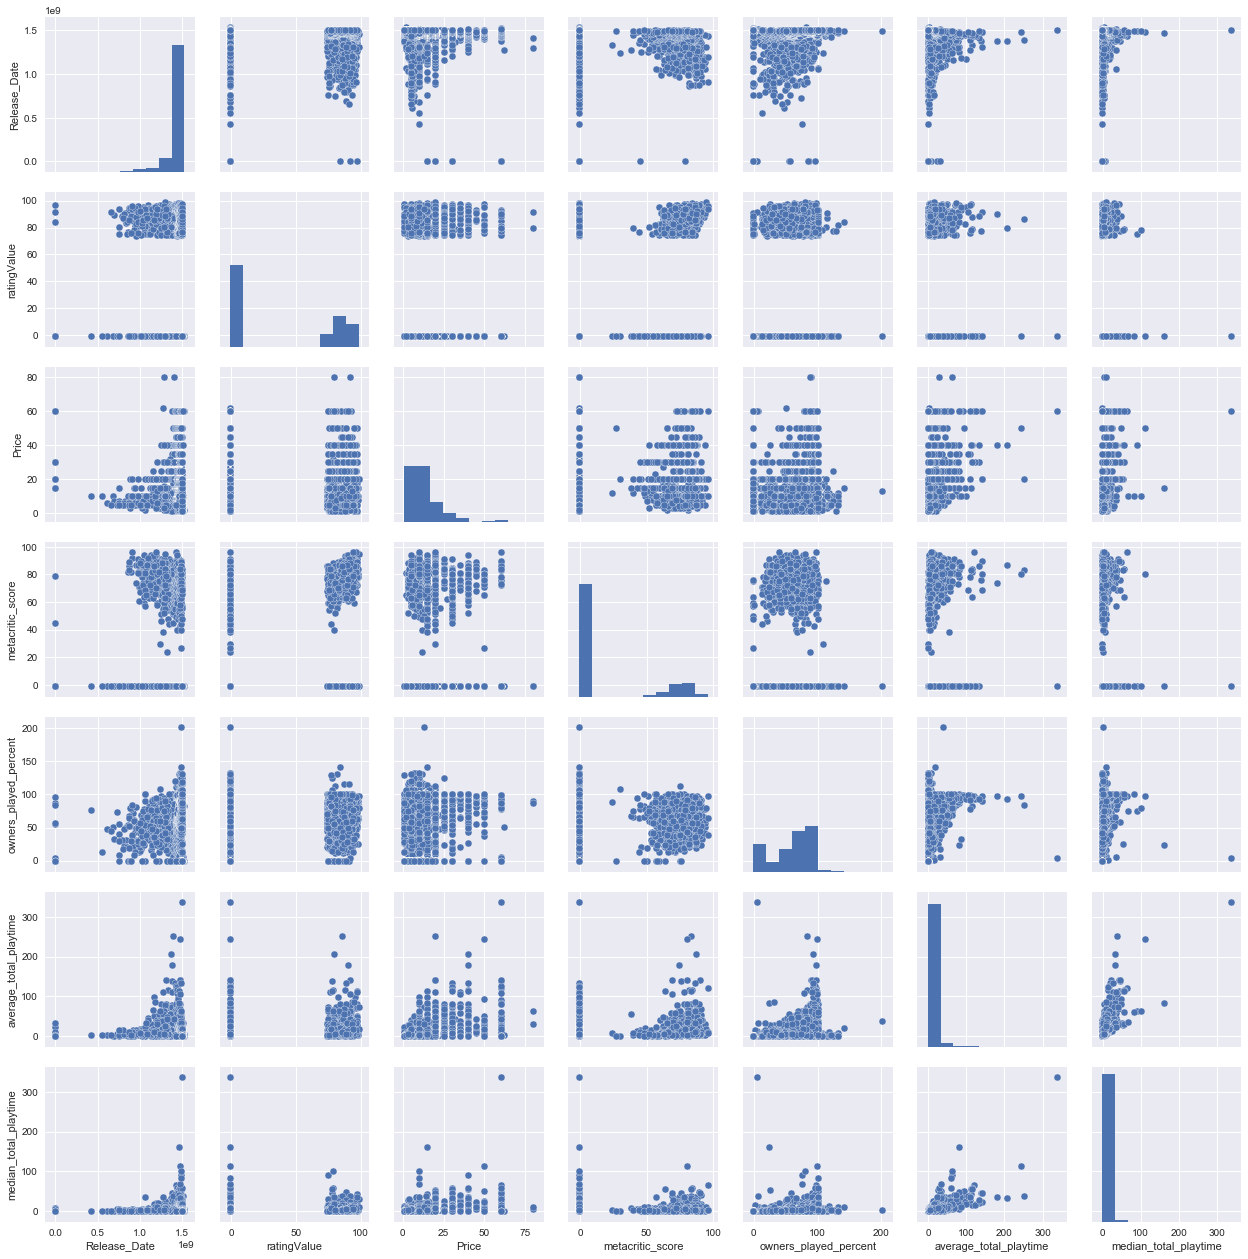

In [10]:
df_subset = df.loc[:,['Release_Date', 'ratingValue',
       'Price', 
       'metacritic_score',
       'owners_played_percent',
       'average_total_playtime', 'median_total_playtime']]
sns.pairplot(df_subset)

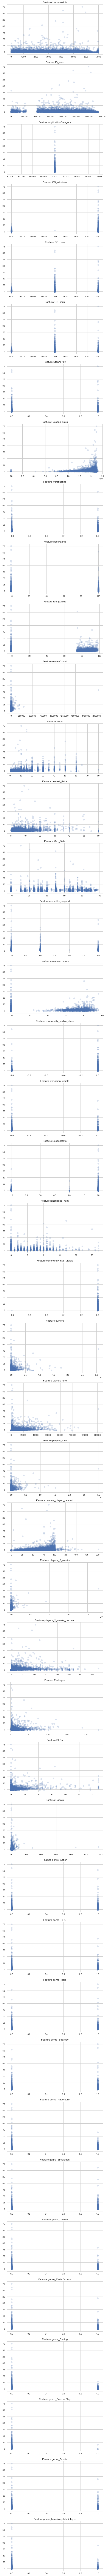

In [22]:
fig,ax = plt.subplots(ncols=1,nrows=len(X.columns),figsize=(8, 220))

for i,feature in enumerate(X):
    ax[i].scatter(X[feature],y,alpha=.2)
    ax[i].set_title("Feature "+str(feature))

In [21]:
"""('OS_windows', 0.0),
 ('OS_mac', 0.0),
 ('OS_linux', 0.0),
 ('SteamPlay', 0.0),
 ('Release_Date', -0.0003126391802476204),
 ('worstRating', -0.0),
 ('bestRating', -1567.3410435531523),
 ('ratingValue', 3593.9072708554922),
 ('Price', -0.0),
 ('Lowest_Price', -2081.2772418718241),
 ('Max_Sale', 1499.3564564871849),
 ('controller_support', 0.0),
 ('metacritic_score', 2105.4334582222991),
 ('community_visible_stats', 0.0),
 ('workshop_visible', 0.0),
 ('releasestate', -0.0),
 ('languages_num', 0.0),
 ('community_hub_visible', 0.0),
 ('owners_played_percent', 0.0),
 ('players_2_weeks_percent', -1.7373146986772761),
 ('median_total_playtime', -0.0),
 ('average_total_playtime', 6063.7059692453195),
 ('Packages', 22882.046944052454),
 ('DLCs', -0.0),
 ('Depots', -885.06284036310183),"""

IndentationError: unexpected indent (<ipython-input-21-c8807229c5d1>, line 2)

## A closer look at a few of the more interesting features

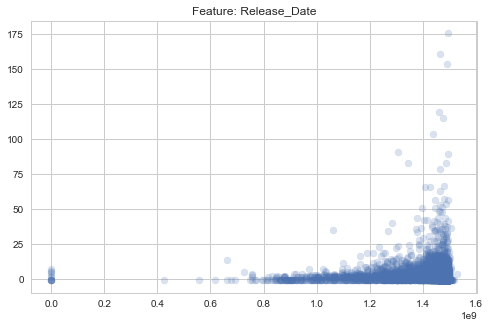

In [23]:
feature = 'Release_Date'
plt.figure(figsize=(8, 5))
plt.title("Feature: "+str(feature))
plt.scatter(X[feature],y,alpha=.2);

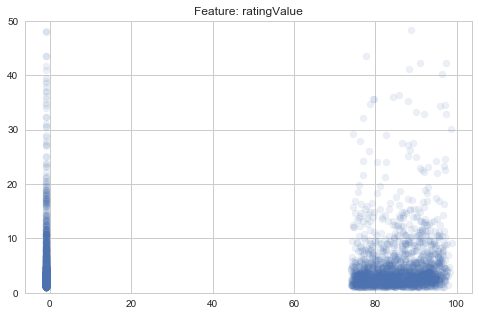

In [24]:
feature = 'ratingValue'
fig, ax =  plt.subplots(figsize=(8, 5))
#ax.set_ylim(100,5e7)
#ax.set_yscale('log')
ax.set_ylim(0,50)

ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

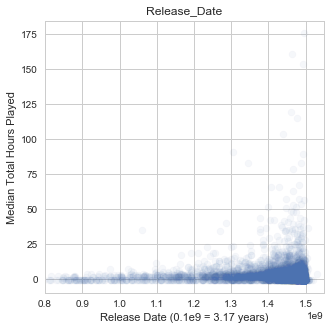

In [34]:
feature = 'Release_Date'
fig, ax =  plt.subplots(figsize=(5, 5))
#ax.set_ylim(100,5e7)
#ax.set_yscale('log')
ax.set_xlim(0.8e9,1.55e9)
ax.set_title(str(feature))
ax.set_ylabel("Median Total Hours Played")
ax.set_xlabel("Release Date (0.1e9 = 3.17 years)")
ax.scatter(X[feature],y,alpha=.05);

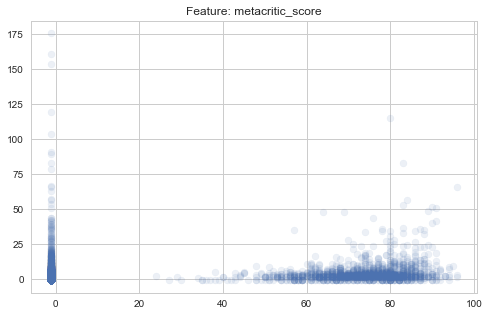

In [26]:
feature = 'metacritic_score'
fig, ax =  plt.subplots(figsize=(8, 5))
#ax.set_ylim(100,5e7)
#ax.set_yscale('log')
#ax.set_xlim(20,100)
ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

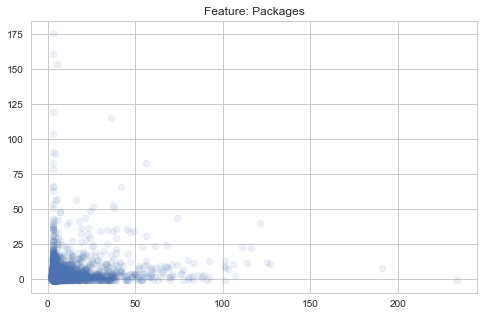

In [27]:
feature = 'Packages'
fig, ax =  plt.subplots(figsize=(8, 5))
#ax.set_ylim(100,5e7)
#ax.set_yscale('log')
#ax.set_xlim(0,100)
ax.set_title("Feature: "+str(feature))
ax.scatter(X[feature],y,alpha=.1);

## and for the features I determined were 'cheating' due to being caused by the target
#### 'reviewCount', 'owners', 'owners_unc', 'players_total', 'players_2_weeks',

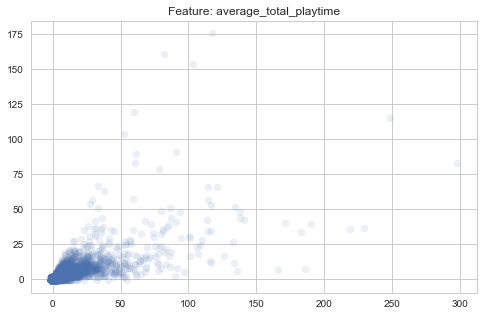

In [28]:
feature = 'average_total_playtime'
fig, ax =  plt.subplots(figsize=(8, 5))
ax.set_title("Feature: "+str(feature))
ax.scatter(df[feature],y,alpha=.1);

In [27]:
df.describe()

,Unnamed: 0,ID_num,applicationCategory,OS_windows,OS_mac,OS_linux,SteamPlay,Release_Date,worstRating,bestRating,ratingValue,reviewCount,Price,Lowest_Price,Max_Sale,controller_support,metacritic_score,community_visible_stats,workshop_visible,releasestate,languages_num,community_hub_visible,owners,owners_unc,players_total,owners_played_percent,players_2_weeks,players_2_weeks_percent,median_total_playtime,average_total_playtime,Packages,DLCs,Depots,genre_Action,genre_RPG,genre_Indie,genre_Strategy,genre_Adventure,genre_Simulation,genre_Casual,genre_Early Access,genre_Racing,genre_Free to Play,genre_Sports,genre_Massively Multiplayer
count,3708.000,3708.000,3708.0,3708.000,3708.000,3708.000,3708.000,3.708e+03,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.0,3.708e+03,3708.000,3.708e+03,3708.000,3.708e+03,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.000,3708.0,3708.000,3708.000,3708.000,3.708e+03,3708.000,3708.000
mean,2265.307,414320.788,0.0,-0.062,0.323,0.218,0.408,1.426e+09,-0.550,44.406,37.858,1810.042,13.005,6.476,49.950,-0.322,17.440,-0.235,-0.918,0.794,1.800,0.0,2.173e+05,7792.555,1.504e+05,59.026,1.140e+04,9.608,3.500,7.472,6.759,1.976,5.655,0.498,0.206,0.680,0.207,0.408,0.2,0.247,0.164,0.038,5.394e-04,0.049,0.011
std,1371.999,163659.329,0.0,0.242,0.586,0.543,0.492,1.378e+08,0.498,50.249,43.222,9349.815,10.850,7.483,27.313,0.765,32.837,0.424,0.274,0.602,3.598,0.0,7.333e+05,11045.902,5.716e+05,33.628,6.620e+04,17.880,8.964,16.490,11.789,6.257,25.267,0.500,0.405,0.467,0.405,0.492,0.4,0.431,0.370,0.191,2.322e-02,0.217,0.105
min,0.000,50.000,0.0,-1.000,-1.000,-1.000,0.000,-1.000e+00,-1.000,-1.000,-1.000,-1.000,0.990,0.090,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,0.0,-1.000e+00,-1.000,-1.000e+00,-1.000,-1.000e+00,-1.000,-1.000,-1.000,2.000,0.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000e+00,0.000,0.000
25%,1077.750,313712.500,0.0,0.000,0.000,0.000,0.000,1.424e+09,-1.000,-1.000,-1.000,-1.000,4.990,1.990,30.000,-1.000,-1.000,0.000,-1.000,1.000,0.000,0.0,1.557e+03,1293.000,1.106e+03,39.992,0.000e+00,0.000,-1.000,1.100,3.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000e+00,0.000,0.000
50%,2198.500,429035.000,0.0,0.000,0.000,0.000,0.000,1.468e+09,-1.000,-1.000,-1.000,-1.000,9.990,4.040,50.000,-1.000,-1.000,0.000,-1.000,1.000,0.000,0.0,1.327e+04,3350.000,8.848e+03,67.385,9.340e+02,2.575,2.400,3.500,3.000,0.000,3.000,0.000,0.000,1.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000e+00,0.000,0.000
75%,3413.250,546502.500,0.0,0.000,1.000,1.000,1.000,1.489e+09,0.000,100.000,84.240,526.250,15.990,8.490,75.000,0.000,-1.000,0.000,-1.000,1.000,2.000,0.0,1.219e+05,10152.000,7.393e+04,85.710,3.981e+03,10.752,4.100,7.600,5.000,1.000,6.000,1.000,0.000,1.000,0.000,1.000,0.0,0.000,0.000,0.000,0.000e+00,0.000,0.000
max,4998.000,672570.000,0.0,0.000,1.000,1.000,1.000,1.530e+09,0.000,100.000,98.720,292783.000,79.990,59.990,99.000,1.000,96.000,0.000,0.000,1.000,27.000,0.0,1.752e+07,119154.000,1.521e+07,201.660,1.904e+06,151.190,337.100,337.100,234.000,64.000,1165.000,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.000,1.000,1.000e+00,1.000,1.000


# Trying a simple tree model

In [28]:
## To start, we will build a single tree
from sklearn import tree

# Set some (starting) parameters
#dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=4)
dtrmodel = tree.DecisionTreeRegressor(min_samples_split=10, max_depth=6, min_samples_leaf=8)

# Fit the model to some training data
dtrmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=8, min_samples_split=10,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [29]:
# Export the structure of the tree to a file

tree.export_graphviz(dtrmodel, out_file='tree.dot',feature_names = X_train.columns)

In [30]:
# Look at the file (using ! for a command line access)

!head tree.dot

digraph Tree {
node [shape=box] ;
0 [label="Price <= 33.49\nmse = 94.9877\nsamples = 2595\nvalue = 3.563"] ;
1 [label="players_total <= 642.0\nmse = 37.0033\nsamples = 2458\nvalue = 2.9237"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="owners_played_percent <= 19.19\nmse = 1.8683\nsamples = 480\nvalue = -0.7377"] ;
1 -> 2 ;
3 [label="mse = 0.0\nsamples = 409\nvalue = -1.0"] ;
2 -> 3 ;
4 [label="Depots <= 5.5\nmse = 9.9513\nsamples = 71\nvalue = 0.7732"] ;


# Now:
# 1) Open a new browser tab and go to http://webgraphviz.com 
# 2) Open the tree.dot file as a text file
# 3) Copy and Paste the text of the file into the webpage

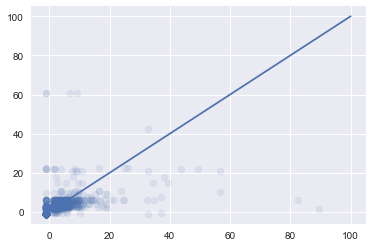

In [32]:
tree_pred_test = dtrmodel.predict(X_test)
plt.scatter(y_test, tree_pred_test,alpha=.1)
#plt.xscale('log')
#plt.yscale('log')
plt.plot(np.linspace(0,100,1000),np.linspace(0,100,1000));


In [33]:
# Root Mean Square Error
np.sqrt(np.mean((tree_pred_test - y_test)**2))

6.9096023464634797

In [34]:
r2_score(y_test, tree_pred_test)

-0.034862251832500579

# Random Forrest

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
# Initialize the model, then fit it on the training data

#this test run uses the parameters from the RealEstate date as a starting point
rfmodel1 = RandomForestRegressor(n_estimators = 500, min_samples_leaf=5, max_features=4, n_jobs=-1)
rfmodel1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [37]:
# Use the trained model to predict the results on the test set

rf1_test_pred = rfmodel1.predict(X_test)

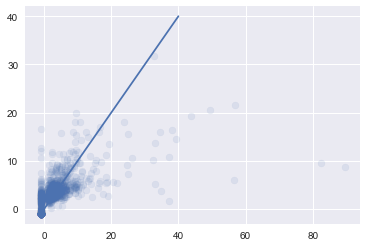

In [39]:
#Plot actual vs predicted
plt.scatter(y_test, rf1_test_pred,alpha=.1)
plt.plot(np.linspace(0,40,1000),np.linspace(0,40,1000));



In [40]:
# Root Mean Square Error 
np.sqrt(np.mean((rf1_test_pred - y_test)**2))

5.4967403063215823

In [41]:
#R squared score
r2_score(y_test, rf1_test_pred)

0.34508207686625703

In [42]:
#look at the importance of each parameter:
coefs = rfmodel1.fit(X,y).feature_importances_   #note, run on whole dataset, not just X_train,y_train
sorted(zip(X.columns,coefs), key = lambda x:x[1], reverse=True)

[('owners_played_percent', 0.10080129863992805),
 ('players_2_weeks', 0.090551416920312294),
 ('Lowest_Price', 0.084788362596043179),
 ('Price', 0.084011214572502393),
 ('players_2_weeks_percent', 0.070958544348571462),
 ('players_total', 0.065260344512809335),
 ('Release_Date', 0.055658441917200409),
 ('owners', 0.052078383580902464),
 ('owners_unc', 0.050077907461873183),
 ('DLCs', 0.042245714601323092),
 ('Depots', 0.041960356798751187),
 ('ID_num', 0.029058233270296028),
 ('Unnamed: 0', 0.028929030774461531),
 ('reviewCount', 0.027635581695581599),
 ('Packages', 0.025414685260452877),
 ('Max_Sale', 0.019431589347659737),
 ('languages_num', 0.016084175641229142),
 ('ratingValue', 0.014746841346304147),
 ('genre_Indie', 0.01333799180022922),
 ('genre_Strategy', 0.012448921384153953),
 ('metacritic_score', 0.012074694814394498),
 ('genre_Action', 0.0075129107863175712),
 ('controller_support', 0.0065814881591356933),
 ('workshop_visible', 0.0060125670324035364),
 ('community_visible_s

0.358967189309


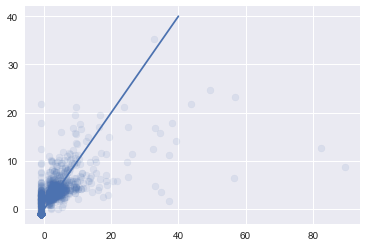

In [44]:
rfmodel1 = RandomForestRegressor(n_estimators = 200, min_samples_leaf=5,\
           max_features=9, n_jobs=-1, bootstrap=True)
rfmodel1.fit(X_train,y_train)
rf1_test_pred = rfmodel1.predict(X_test)

print(r2_score(y_test, rf1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.1)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(100,1e7)
#plt.ylim(100,1e7)
plt.plot(np.linspace(0,40,1000),np.linspace(0,40,1000));

# Gradient Boosted Tree (best so far)

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [46]:
gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=0.11,\
                max_depth = 3,max_leaf_nodes=12,n_estimators=150,loss='huber',\
                min_samples_split=2)

In [47]:
gbmodel1.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.11, loss='huber', max_depth=3,
             max_features=None, max_leaf_nodes=12,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, presort='auto', random_state=None,
             subsample=0.8, verbose=0, warm_start=False)

In [48]:
gb1_test_pred = gbmodel1.predict(X_test)

0.31786838136


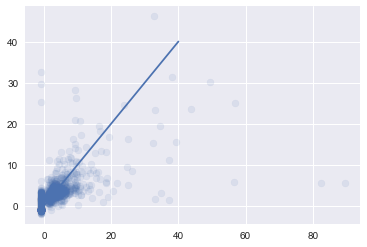

In [50]:
print(r2_score(y_test, gb1_test_pred))

plt.scatter(y_test, gb1_test_pred,alpha=.1)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(100,1e7)
#plt.ylim(100,1e7)
plt.plot(np.linspace(0,40,1000),np.linspace(0,40,1000));

0.373713453879


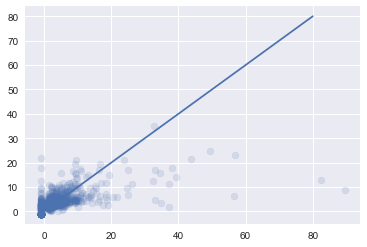

In [51]:
#try to tune this a little better (used the loops below)
gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=.11,\
                max_depth = 10,max_leaf_nodes=7,n_estimators=120,loss='huber',\
                min_samples_split=4 )
gbmodel1.fit(X_train,y_train)
gb1_test_pred = gbmodel1.predict(X_test)

print(r2_score(y_test, gb1_test_pred))

plt.scatter(y_test, rf1_test_pred,alpha=.15)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(100,1e7)
#plt.ylim(100,1e7)
plt.plot(np.linspace(0,80,1000),np.linspace(0,80,1000));

[ 0.4         0.42894737  0.45789474  0.48684211  0.51578947  0.54473684
  0.57368421  0.60263158  0.63157895  0.66052632  0.68947368  0.71842105
  0.74736842  0.77631579  0.80526316  0.83421053  0.86315789  0.89210526
  0.92105263  0.95      ]
0.4 0.364081101049
0.428947368421 0.372614243074
0.457894736842 0.364355711425
0.486842105263 0.368669845732
0.515789473684 0.366709395366
0.544736842105 0.368897863807
0.573684210526 0.375547981898
0.602631578947 0.36519940166
0.631578947368 0.357124116082
0.660526315789 0.378744069089
0.689473684211 0.37183310611
0.718421052632 0.358623330854
0.747368421053 0.372445453316
0.776315789474 0.371430681332
0.805263157895 0.360514069493
0.834210526316 0.374695764299
0.863157894737 0.369606359937
0.892105263158 0.374984902497
0.921052631579 0.366559964054
0.95 0.375499266696


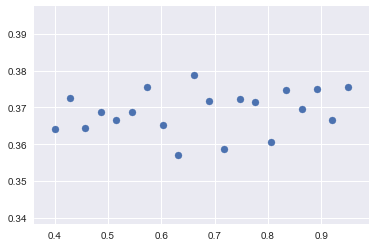

In [52]:
#searching for good tuning parameters
results = {}
space = np.linspace(0.4,0.95,20)
#space = [10,20,30,40,60,70,80,90,100,110,125,150,175,200,250,300,400]
print(space)
for i in space:
    gbmodel1 = GradientBoostingRegressor(subsample=0.8, learning_rate=.11,\
                max_depth = 10,max_leaf_nodes=7,n_estimators=120,loss='huber',\
                min_samples_split=4 )
    gbmodel1.fit(X_train,y_train)
    gb1_test_pred = gbmodel1.predict(X_test)
    Rsq = r2_score(y_test, gb1_test_pred)
    print(i,Rsq)
    results[i]=Rsq
results
plt.scatter(list(results.keys()),list(results.values()))

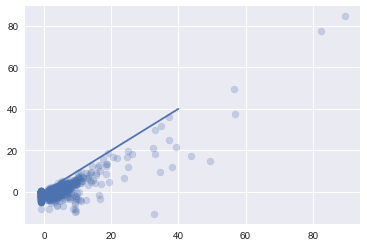

In [54]:
plt.scatter(y_test,y_test-gb1_test_pred,alpha=.25)
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(-1e6,1e6)
plt.plot(np.linspace(0,40,1000),np.linspace(0,40,1000));

# Trying out the LASSO

## Gradient Descent Algorithm

In [56]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

In [57]:
lr_model2 = LinearRegression()
lr_model2.fit(X_train.loc[:,feature_columns],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
list(zip(feature_columns,lr_model2.coef_))

[('Unnamed: 0', -0.0001410029353440017),
 ('ID_num', 4.3539869434194379e-06),
 ('applicationCategory', 2.8139800186263044e-07),
 ('OS_windows', 1.6336525169722642),
 ('OS_mac', -0.24635800324598833),
 ('OS_linux', -0.10937401803063523),
 ('SteamPlay', 0.83510793987371668),
 ('Release_Date', 5.3659254791241229e-09),
 ('worstRating', -0.00020994877387081612),
 ('bestRating', -0.021204828207767489),
 ('ratingValue', 0.022815846194648794),
 ('reviewCount', -2.0081802887039757e-05),
 ('Price', 0.036060485082630184),
 ('Lowest_Price', 0.30665608105307979),
 ('Max_Sale', 0.039290922301870909),
 ('controller_support', -0.38563524218444217),
 ('metacritic_score', -0.0054804791812780428),
 ('community_visible_stats', -0.94290638920657321),
 ('workshop_visible', 1.5194085404867133),
 ('releasestate', -0.38567953708460156),
 ('languages_num', -0.02733140896307391),
 ('community_hub_visible', -4.5397713366313042e-15),
 ('owners', -3.1455139442027047e-06),
 ('owners_unc', 0.00016889610343723271),
 (

In [59]:
GD_test_set_prediction = lr_model2.predict(X_test.loc[:,feature_columns])

In [60]:
#R^2 score
r2_score(y_test, GD_test_set_prediction)

0.29066927364155193

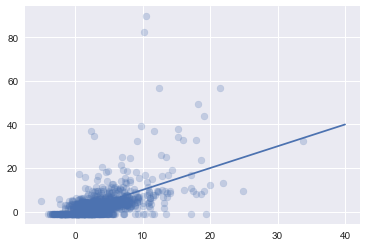

In [61]:
plt.scatter(GD_test_set_prediction,y_test,alpha=.25)
#plt.yscale('log')
#plt.xscale('log')
plt.plot(np.linspace(0,40,1000),np.linspace(0,40,1000));

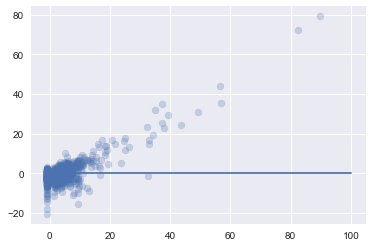

In [64]:
plt.scatter(y_test,y_test-GD_test_set_prediction,alpha=.25)
#plt.yscale('log')
#plt.xscale('log')
#plt.ylim(-1e6,1e6)
plt.plot(np.linspace(1,100,1000),np.linspace(0,0,1000))

In [65]:
#LASSO!!
LinearRegression_2 = Lasso(alpha = 2500)
LinearRegression_2.fit(X_train.loc[:,feature_columns],y_train)


Lasso(alpha=2500, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
list(zip(feature_columns,LinearRegression_2.coef_))

[('Unnamed: 0', -0.0),
 ('ID_num', -1.3854319385622227e-06),
 ('applicationCategory', 0.0),
 ('OS_windows', 0.0),
 ('OS_mac', 0.0),
 ('OS_linux', -0.0),
 ('SteamPlay', -0.0),
 ('Release_Date', 5.3884812204299942e-09),
 ('worstRating', 0.0),
 ('bestRating', 0.0),
 ('ratingValue', 0.0),
 ('reviewCount', -0.0),
 ('Price', 0.0),
 ('Lowest_Price', 0.0),
 ('Max_Sale', -0.0),
 ('controller_support', -0.0),
 ('metacritic_score', 0.0),
 ('community_visible_stats', -0.0),
 ('workshop_visible', 0.0),
 ('releasestate', 0.0),
 ('languages_num', 0.0),
 ('community_hub_visible', 0.0),
 ('owners', -3.3167828128551146e-06),
 ('owners_unc', 0.00018564845207651539),
 ('players_total', 1.120792730721085e-07),
 ('owners_played_percent', 0.0),
 ('players_2_weeks', 4.0349089524074937e-05),
 ('players_2_weeks_percent', 0.0),
 ('Packages', 0.0),
 ('DLCs', 0.0),
 ('Depots', 0.0),
 ('genre_Action', -0.0),
 ('genre_RPG', 0.0),
 ('genre_Indie', -0.0),
 ('genre_Strategy', 0.0),
 ('genre_Adventure', -0.0),
 ('genre_

In [67]:
LinearRegression_2_pred = LinearRegression_2.predict(X_test.loc[:,feature_columns])

0.153497734055


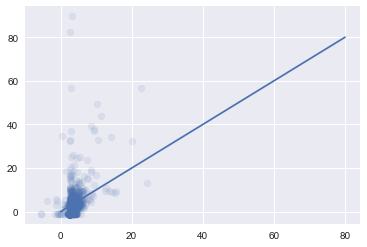

In [68]:
print(r2_score(y_test, LinearRegression_2_pred))

plt.scatter(LinearRegression_2_pred,y_test,alpha=.1)
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(100,1e7)
#plt.ylim(100,1e7)
plt.plot(np.linspace(0,80,1000),np.linspace(0,80,1000));

## trying out Andrew's Cross-Validation

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)



StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
# This next block of code will run a cross-validation

alphalist = 10**(np.linspace(-3,6,200))#linspace(-3,4,200))
err_vec_test = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))

for i,curr_alpha in enumerate(alphalist):

    steps = [('standardize', StandardScaler()), ('lasso', Lasso(alpha = curr_alpha))]
#    steps = [('standardize', StandardScaler()), ('ridge', Ridge(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,feature_columns], y_train)
    test_set_pred7 = pipe.predict(X_test.loc[:,feature_columns])
    err_vec_test[i] = np.sqrt(np.mean((test_set_pred7 - y_test)**2))

    train_set_pred7 = pipe.predict(X_train.loc[:,feature_columns])
    err_vec_train[i] = np.sqrt(np.mean((train_set_pred7 - y_train)**2))

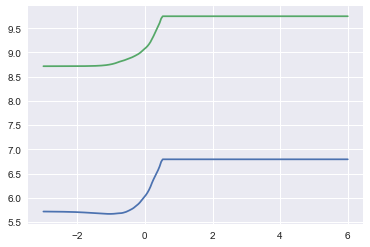

In [71]:
plt.plot(np.log10(alphalist),err_vec_test)
plt.plot(np.log10(alphalist),err_vec_train)

In [72]:
alphalist[np.argmin(err_vec_test)]

0.088048835816434648

In [73]:
from sklearn.linear_model import lars_path

In [74]:
std = StandardScaler()
#std.fit(X_train.values.astype(float))
std.fit(X_train)

X_tr = std.transform(X_train)
X_te = std.transform(X_test)

In [75]:
## Note: lars_path takes numpy matrices, not pandas dataframes

print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso', verbose=True)

Computing regularization path using the LARS ...
.

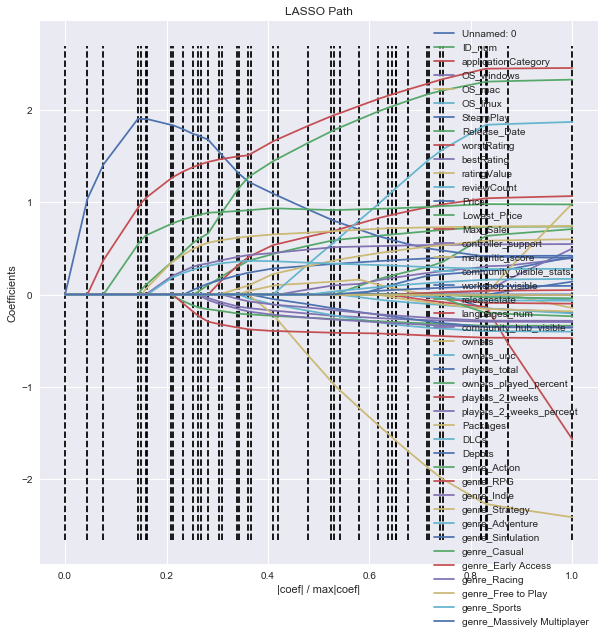

In [76]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(10,10))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
#plt.xscale('log')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()